## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merge_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')

# Display the data table for preview
combined_data = merge_data.sort_values(["Mouse ID"], ascending=True)
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
902,a203,20,55.173336,1,Infubinol,Female,20,23
907,a203,45,67.973419,2,Infubinol,Female,20,23
906,a203,40,63.593490,2,Infubinol,Female,20,23
905,a203,35,61.931650,2,Infubinol,Female,20,23
904,a203,30,59.523197,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
103,z969,15,54.713005,2,Naftisol,Male,9,30
102,z969,10,52.656081,1,Naftisol,Male,9,30
101,z969,5,49.332999,0,Naftisol,Male,9,30
100,z969,0,45.000000,0,Naftisol,Male,9,30


In [3]:
# Checking the number of mice.
mice_num = combined_data["Mouse ID"].value_counts()
mice_total = mice_num.sum()
print(len(mice_num))

249


In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
check_dup_mouse_count = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
check_dup_mouse_count 

array(['g989'], dtype=object)

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
#see_dup_mice = combined_data.set_index('Mouse ID')
#mouse_data = see_dup_mice.loc['g989', :]
#mouse_data

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,30,59.082294,1,Propriva,Female,21,26
g989,25,56.045564,1,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,20,54.657650,1,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,35,62.570880,2,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26


In [44]:
combined_data['Mouse ID'].value_counts()

g989    13
h246    10
g296    10
s710    10
f545    10
        ..
x336     1
f932     1
n482     1
v199     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
clean_combined_data = combined_data.drop_duplicates(subset=['g989'])
clean_combined_data = clean_combined_data.reset_index()



KeyError: Index(['g989'], dtype='object')

In [7]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
means = combined_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = combined_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = combined_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standards = combined_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = combined_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

newtable = pd.DataFrame(means)
newtable2 = newtable.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Vol"})

newtable2["Median Tumor Vol"] = medians
newtable2["Tumor Vol Variance"] = variances
newtable2["Tumor Vol Std Dev"] = standards
newtable2["Tummor Vol Std Err"] = sems

newtable2


,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std Dev,Tummor Vol Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
table_setup = combined_data.groupby('Drug Regimen')
agg_table = table_setup.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
agg_table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

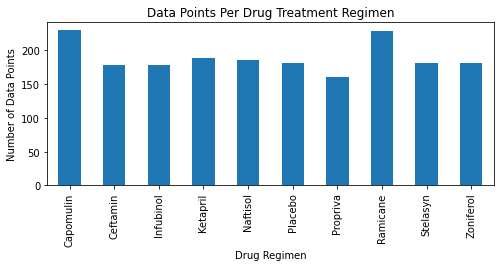

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_data_points = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_plot = regimen_data_points.plot(kind="bar", figsize=(8,3))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")
plt.ioff()


In [11]:
#import matplotlib.pyplot as plt
drug_regimens = agg_table.index.tolist()
regimen_count = (combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
#print(drug_regimens, regimen_count)

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#bars_in_cities = [8.6, 8.5, 8.3, 7.9, 7.2]
#x_axis = np.arange(len(bars_in_cities))
regimen_count = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(regimen_count))


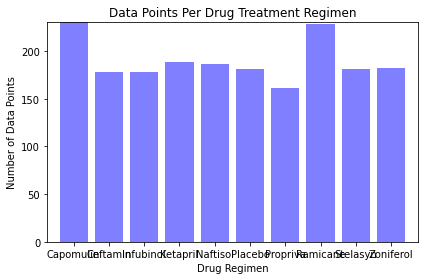

In [13]:
new_plot = plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(regimen_count)+.04)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")
plt.tight_layout()


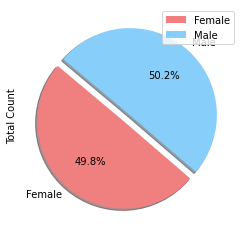

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = combined_data.groupby(["Mouse ID","Sex"])

mouse_gender_df = pd.DataFrame(groupby_gender.size())
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
colors = ['lightcoral','lightskyblue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', explode = explode, colors = colors, autopct="%1.1f%%", shadow = True, startangle=140)
                                
plt.show()

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

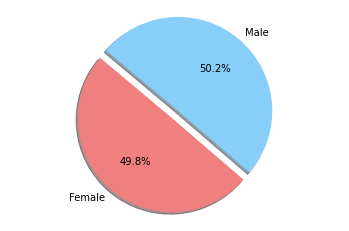

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_regimes = merge_data[merge_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1613,x226,0,45.000000,0,Ceftamin,Male,23,28
1488,x581,0,45.000000,0,Ceftamin,Female,19,28
1478,a275,0,45.000000,0,Ceftamin,Female,20,28
1468,k210,0,45.000000,0,Ceftamin,Male,15,28
...,...,...,...,...,...,...,...,...
1824,g316,45,40.159220,2,Capomulin,Female,22,22
1477,k210,45,68.923185,3,Ceftamin,Male,15,28
460,j913,45,31.560470,1,Ramicane,Female,4,17
1497,x581,45,64.634949,3,Ceftamin,Female,19,28


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
